<a href="https://colab.research.google.com/github/rrrayhan/homecredit_vix/blob/main/Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Load and Read Dataset**

In [3]:
app_train = pd.read_csv("/content/drive/MyDrive/HCI/application_train.csv")

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **Check for Missing Value**

In [5]:
df = app_train.copy()

In [6]:
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/len(df)
dtypes = [df[col].dtype for col in df.columns]
df_null_data = pd.DataFrame({'total_null': total_null,
                            'data_type': dtypes,
                            'percent_missing': percent_missing})
df_null_data.sort_values('percent_missing', ascending=False, inplace=True)
null_data = df_null_data[df_null_data['percent_missing']>0].reset_index()
null_data

,index,total_null,data_type,percent_missing
0,COMMONAREA_MEDI,214865,float64,69.872297
1,COMMONAREA_AVG,214865,float64,69.872297
2,COMMONAREA_MODE,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_MODE,210199,float64,68.354953
8,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953


Drop features that have more than 40% missing value

In [7]:
null_cols = df_null_data.loc[df_null_data['percent_missing']> 40].index.tolist()

In [8]:
def null_cols(df):
    list_missing_cols = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI',
                     'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI',
                     'YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI',
                     'BASEMENTAREA_AVG','BASEMENTAREA_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
                     'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
                     'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
    df.drop(columns=list_missing_cols, inplace = True)

In [9]:
null_cols(df)

# **Check for Duplicate Value**

In [10]:
df.duplicated().sum()

0

There are no duplicate value

# **Preprocessing**

In [11]:
df_preprocessing = df.copy()

In [12]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk,and majority on 0 value
    list_drop = ['ORGANIZATION_TYPE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_MOBIL','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' ,'AMT_REQ_CREDIT_BUREAU_QRT',
                 'WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION']
    df.drop(columns=list_drop, inplace = True)

    # Fill Numerical Null Value using Median because this Median is Robust
    list_num = ['AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())

    # EXT_SOURCE
    list_ext = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']
    for ext in list_ext:
        df[ext] = df[ext].fillna(0)

    # Fill Categorical Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')

    # Transformed These Features into Years
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)

    # Replace Other to Non Dominant Values in Categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)

    # OCCUPATION_TYPE
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)

    # Adjusting String to Float
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)

    # Drop Row that contain XNA in Code Gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [13]:
preprocessing(df_preprocessing)

In [14]:
df_preprocessing.isna().sum().sum()

0

Missing values have all been filled

In [15]:
df_preprocessing.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.000000,0.000000,1.000000e+00
NAME_CONTRACT_TYPE,307511.0,0.904787,0.293509,0.00000,1.000000,1.000000,1.000000,1.000000e+00
CODE_GENDER,307511.0,0.341643,0.474261,0.00000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.00000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.00000,0.000000,1.000000,1.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.50000,16524.000000,24903.000000,34596.000000,2.580255e+05


In [16]:
# Drop Error Value from EMP_LENGTH
df_preprocessing = df_preprocessing[df_preprocessing['EMP_LENGTH'] <=100]

# **Data Exploration**

In [17]:
df_eda = df_preprocessing.copy()

Univariate Analysis

In [18]:
cat = df_eda.select_dtypes(include='object').columns
num = df_eda.select_dtypes(include='number').columns

In [19]:
print(len(cat))
print(len(num))

6
30


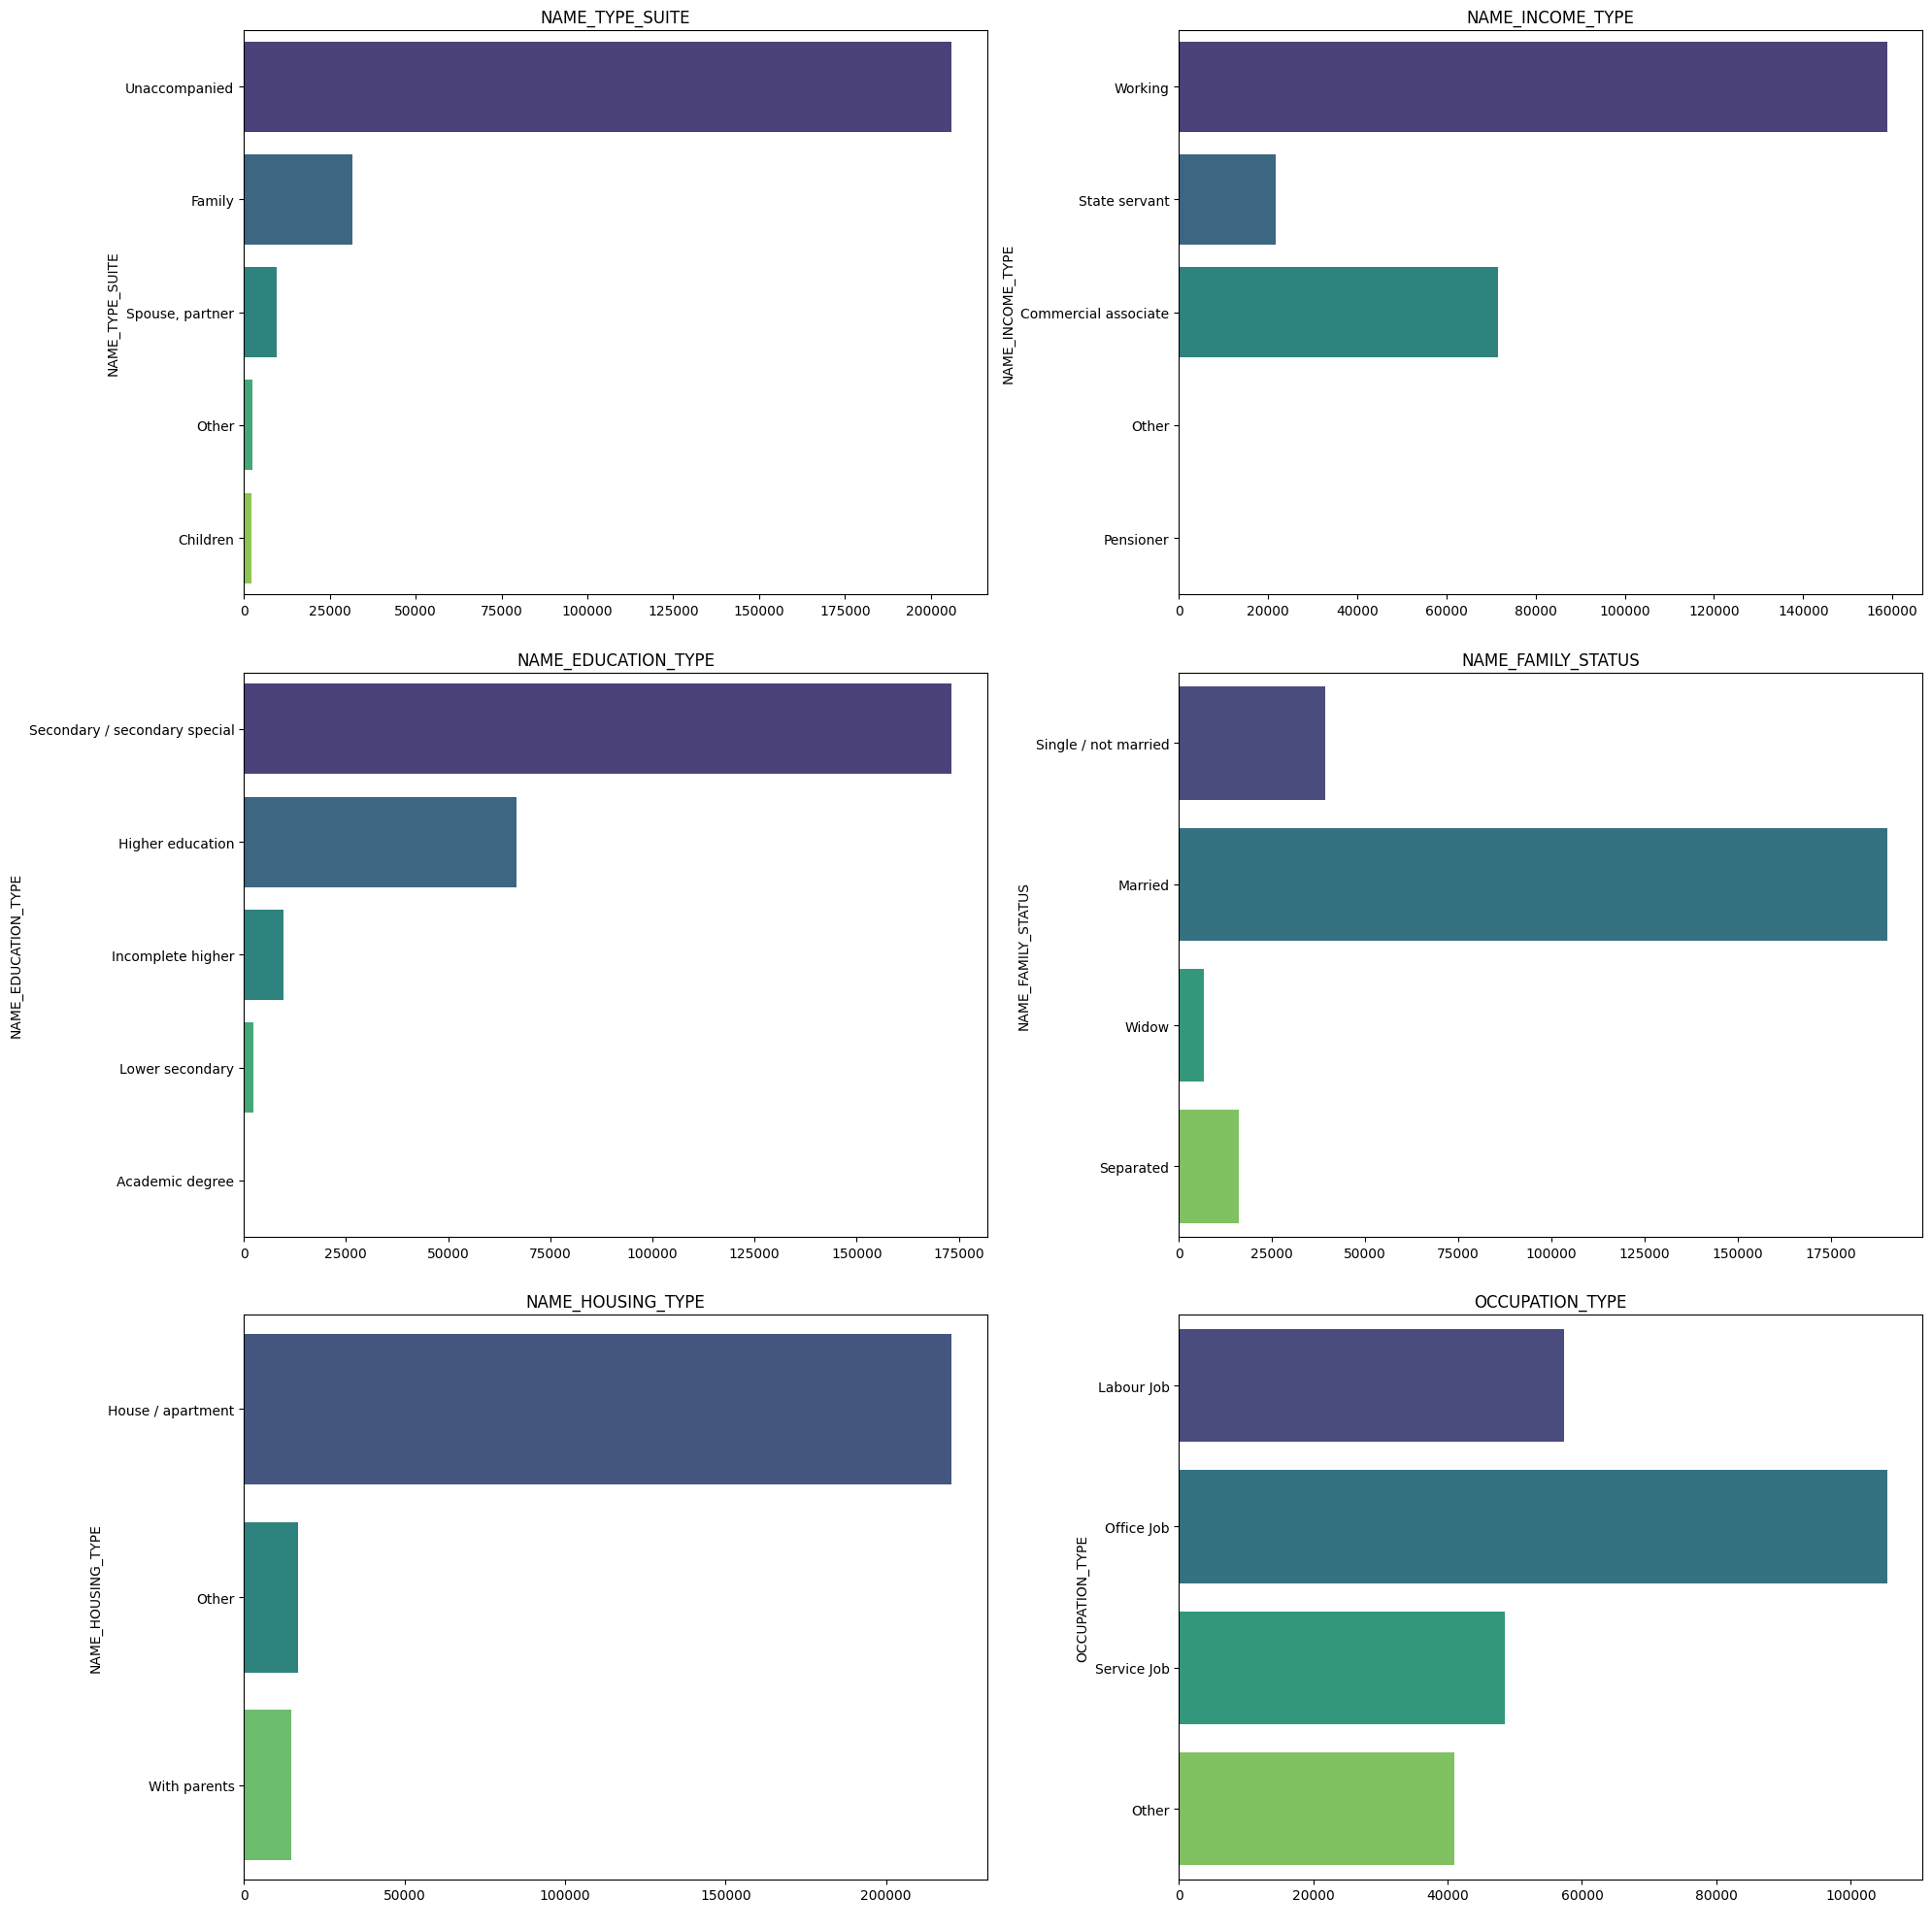

In [20]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

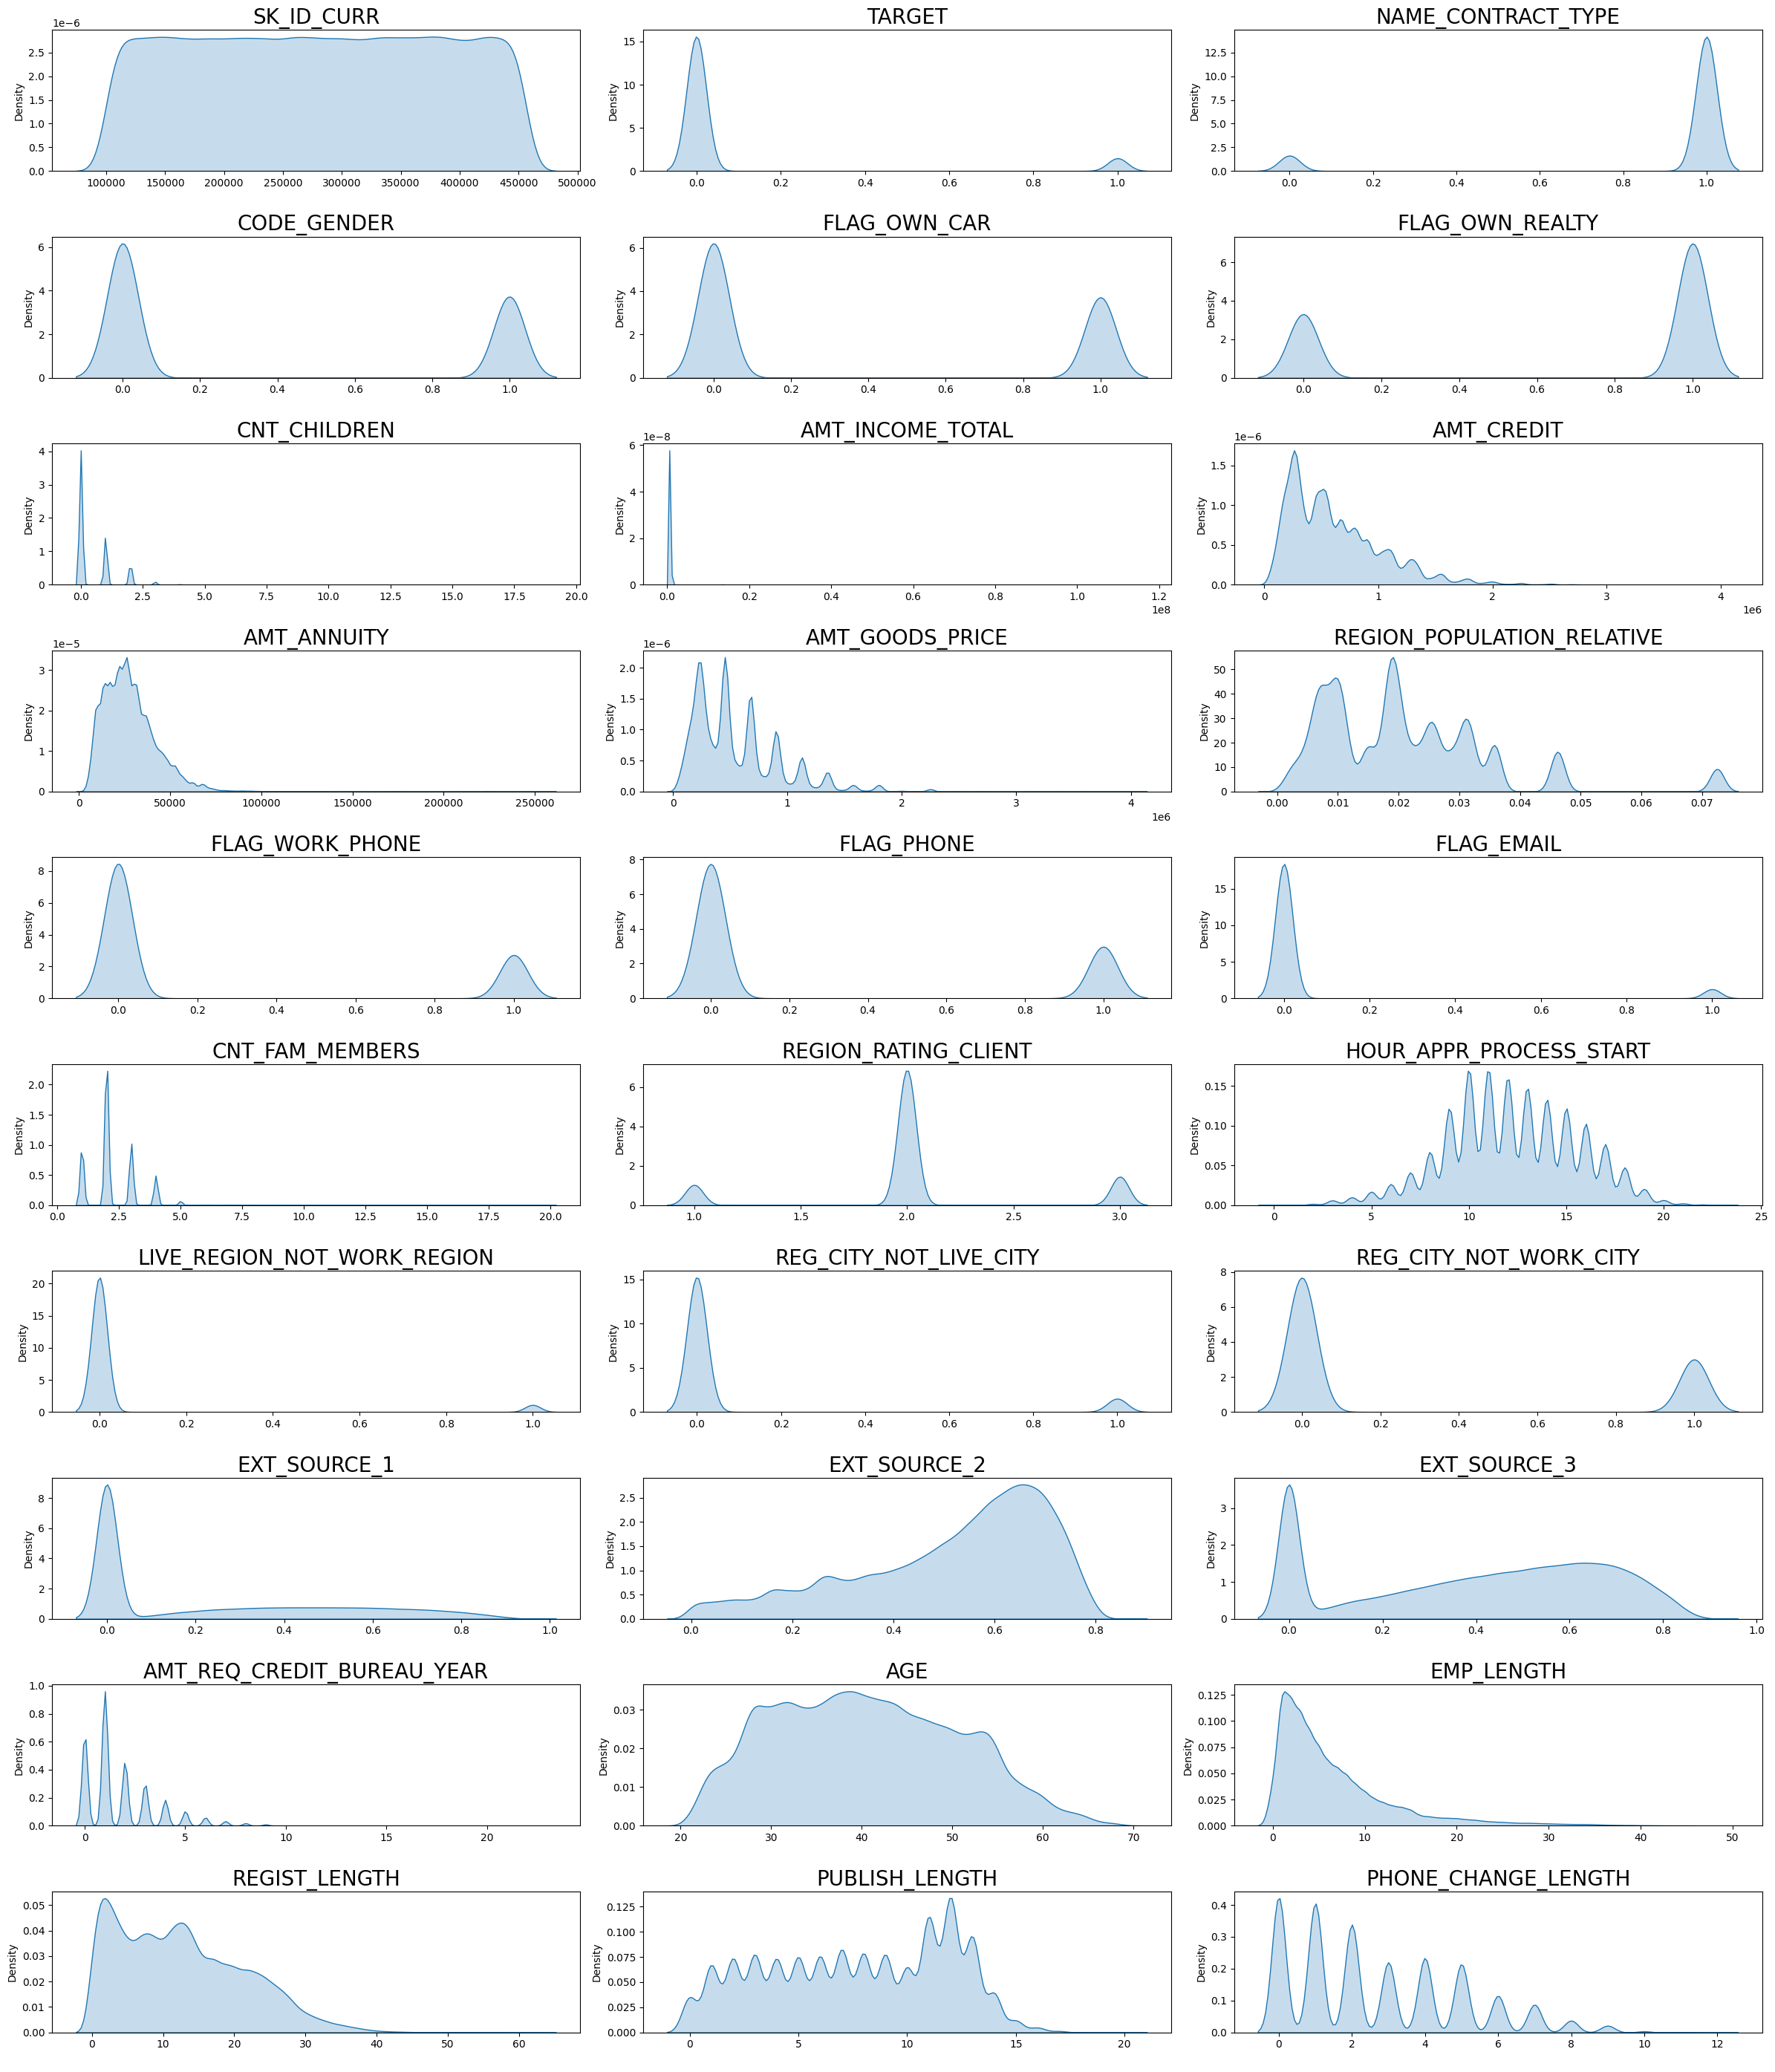

In [21]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,3,i+1)
    sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

Bivariate Analysis

In [22]:
df_eda['TARGET'].value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

Interpretation:
* 0 - clients who do not have credit repayment difficulties.
* 1 - clients who have credit repayment difficulties.

In [23]:
target_map = {
    0: 'Good',
    1: 'Bad'
}

df_eda['TARGET'] = df_eda['TARGET'].map(target_map)

In [24]:
df_eda['TARGET'].value_counts()

TARGET
Good    230302
Bad      21835
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentages of\nCredit Good and Bad\n')

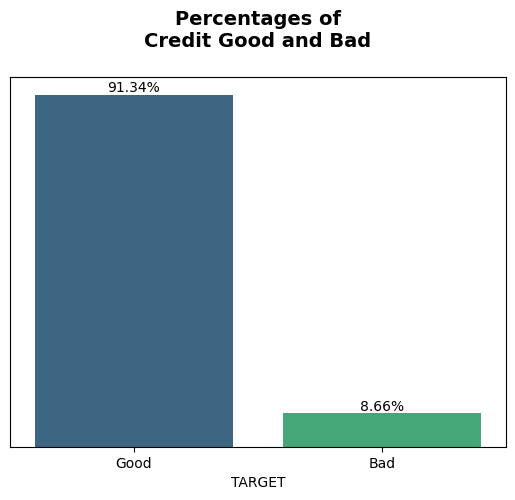

In [25]:
counts = df_eda['TARGET'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette='viridis')
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of\nCredit Good and Bad\n', fontsize=14, fontweight = 'bold')

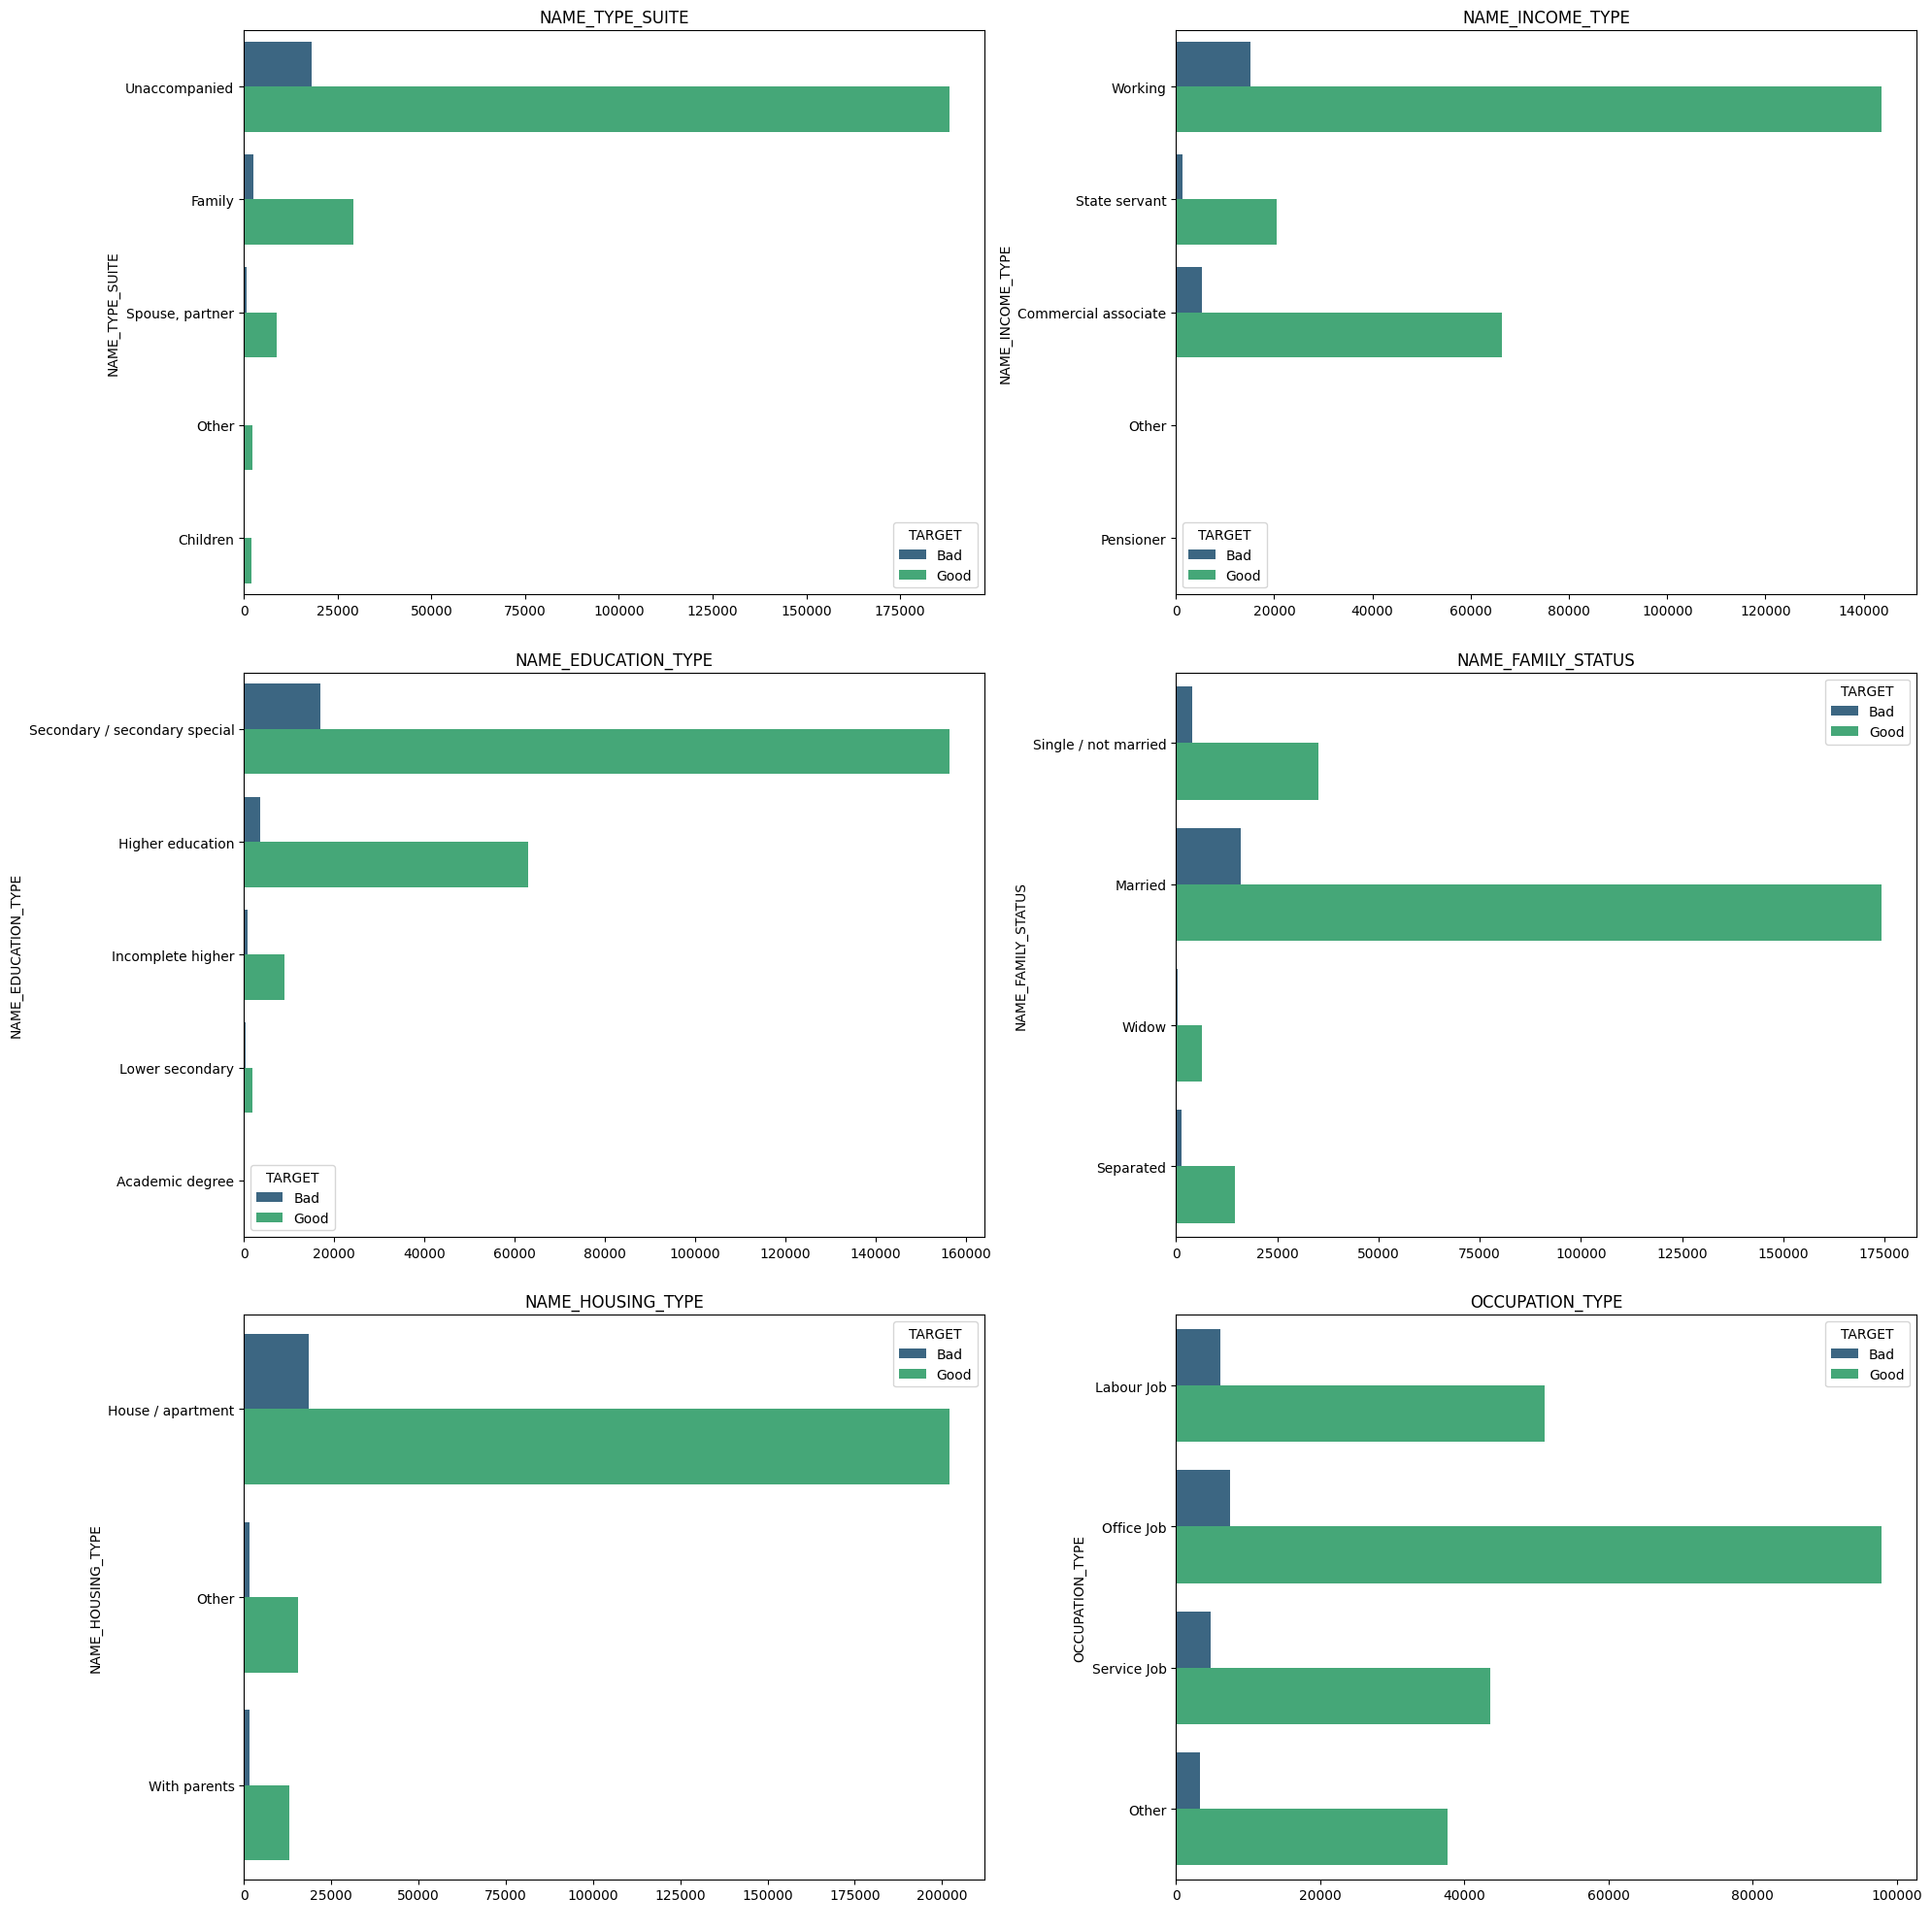

In [26]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], palette='viridis', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

# **Features**

In [27]:
df_select = df_eda.copy()
df_select['TARGET'] = df_select['TARGET'].map({'Good': 0, 'Bad': 1})

In [28]:
feats = ['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE',
        'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AGE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
        'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'TARGET']

In [29]:
df_selected = df_select[feats]

In [30]:
df_selected.sample(10).T

,56135,151808,107116,88688,23835,113530,65280,234701,217404,66028
NAME_EDUCATION_TYPE,Higher education,Secondary / secondary special,Higher education,Higher education,Higher education,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
CODE_GENDER,0,0,0,0,0,1,0,1,0,1
NAME_CONTRACT_TYPE,1,1,1,1,1,1,1,1,1,0
EXT_SOURCE_3,0.4171,0.558507,0.3791,0.0,0.150085,0.360613,0.665855,0.263647,0.0,0.0
EXT_SOURCE_2,0.460819,0.595423,0.709065,0.392703,0.71702,0.638548,0.643439,0.476828,0.60538,0.456259
AGE,29.0,53.0,54.0,43.0,32.0,25.0,28.0,57.0,54.0,51.0
REGION_RATING_CLIENT,2,2,1,2,2,3,2,2,2,2
REG_CITY_NOT_WORK_CITY,0,0,0,0,0,1,1,0,1,1
REG_CITY_NOT_LIVE_CITY,0,0,0,0,0,1,0,0,0,0
AMT_CREDIT,1345500.0,1339884.0,1350000.0,810000.0,284400.0,234369.0,829584.0,502497.0,225000.0,180000.0


In [31]:
df_encod = df_selected.copy()

In [32]:
cat = df_encod.loc[:, (df_encod.dtypes == 'object')].columns.tolist()
cat

['NAME_EDUCATION_TYPE']

In [33]:
dict_edu = {
    'Lower secondary' : 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3}
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].map(dict_edu)

In [47]:
most_frequent_value = df_encod['NAME_EDUCATION_TYPE'].mode()[0]
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].fillna(most_frequent_value)

In [48]:
df_encod.sample(10).T

,267498,22544,250217,95981,22100,205559,219969,298638,164703,102949
NAME_EDUCATION_TYPE,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
CODE_GENDER,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
NAME_CONTRACT_TYPE,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EXT_SOURCE_3,0.272134,0.672243,0.151008,0.755740,0.247191,0.334454,0.431192,0.000000,0.631355,0.000527
EXT_SOURCE_2,0.678106,0.350592,0.603048,0.004090,0.564500,0.568157,0.658600,0.086768,0.233822,0.449145
AGE,47.000000,55.000000,54.000000,28.000000,39.000000,55.000000,40.000000,33.000000,30.000000,55.000000
REGION_RATING_CLIENT,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
REG_CITY_NOT_WORK_CITY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
REG_CITY_NOT_LIVE_CITY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
AMT_CREDIT,405000.000000,770292.000000,284400.000000,722430.000000,307557.000000,587619.000000,760225.500000,239787.000000,90000.000000,797557.500000


# **Modeling**

In [49]:
df_model = df_encod.copy()

In [50]:
# mengelompokkan fitur dan target
x = df_model.drop(columns='TARGET').copy()
y = df_model['TARGET'].copy()

In [51]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print(x_train.shape, x_test.shape)

(201709, 13) (50428, 13)


In [52]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# -----------------------------------------------------
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [53]:
y_train.shape

(201709,)

In [54]:
round(100 * y_train.value_counts() / y_train.shape[0],2)

TARGET
0    91.29
1     8.71
Name: count, dtype: float64

In [55]:
nan_values = df_model.isna().any()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values == True])

Columns with NaN values:
Series([], dtype: bool)


In [57]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------------------
sampling_methods = {'SMOTE': SMOTE(random_state=123),
                    'RandomOverSampler': RandomOverSampler(random_state=123),
                    'RandomUnderSampler': RandomUnderSampler(random_state=123)}

# ----------------------------------------------------------------------
for name, sampler in sampling_methods.items():
    x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    m = XGBClassifier(random_state=123)
    m.fit(x_resampled, y_resampled)
    y_pred = m.predict(x_test)

    # print the classification report
    print(f"Classification report for {name}")
    print(classification_report_imbalanced(y_test, y_pred))

Classification report for SMOTE
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.74      0.48      0.83      0.60      0.37     46153
          1       0.15      0.48      0.74      0.23      0.60      0.35      4275

avg / total       0.87      0.72      0.51      0.78      0.60      0.37     50428

Classification report for RandomOverSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.70      0.63      0.81      0.66      0.44     46153
          1       0.16      0.63      0.70      0.26      0.66      0.44      4275

avg / total       0.89      0.69      0.63      0.76      0.66      0.44     50428

Classification report for RandomUnderSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.64      0.67      0.77      0.66      0.43     46153
          1       0.15      0.67      0.64

In [58]:
rus = RandomUnderSampler(random_state=123)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [59]:
x_train_rus.shape

(35120, 13)

In [60]:
round(100 * y_train_rus.value_counts() / y_train_rus.shape[0],2)

TARGET
0    50.0
1    50.0
Name: count, dtype: float64

# **Model Experiment and Evaluation**

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [72]:
def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(x_test)

    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_rus)

    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train_rus, y_pred_proba_train[:, 1])

    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

In [65]:
def c_matrix_viz(model) :
    y_pred = model.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # mengatur matrix
    fig = plt.figure(figsize = (5,3))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # display matrix
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})

In [67]:
def plot_roc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])

    auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [68]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# **Pre-Tuning**

Logistic Regression

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     46153
           1       0.15      0.64      0.24      4275

    accuracy                           0.66     50428
   macro avg       0.55      0.65      0.51     50428
weighted avg       0.88      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7097
AUC Train scores: 0.706
------------------------------------------------------- 



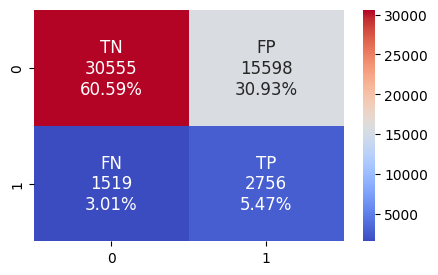

In [73]:
logr = LogisticRegression(random_state=123)
logr.fit(x_train_rus, y_train_rus)

predict(logr)

Random Forest

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     46153
           1       0.15      0.66      0.25      4275

    accuracy                           0.66     50428
   macro avg       0.55      0.66      0.51     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7146
AUC Train scores: 1.0
------------------------------------------------------- 



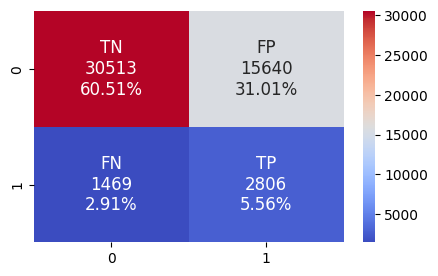

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(x_train_rus, y_train_rus)

predict(rf)

XGBoost

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.64      0.77     46153
           1       0.15      0.67      0.24      4275

    accuracy                           0.64     50428
   macro avg       0.55      0.66      0.50     50428
weighted avg       0.89      0.64      0.72     50428

------------------------------------------------------- 

AUC Test score: 0.7123
AUC Train scores: 0.8598
------------------------------------------------------- 



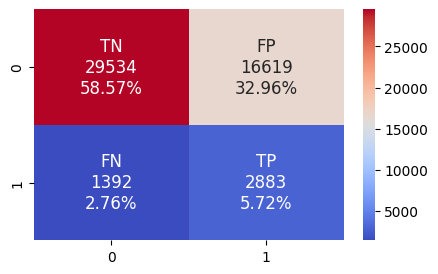

In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(x_train_rus, y_train_rus)

predict(xgb)

# **Tuning**

Logistic Regression

In [77]:
from sklearn import model_selection

# -------------------------------------------------------------------------------
# weights = np.linspace(0.0,0.99,200)
param_distributions = {'class_weight': [{0: 7, 1: 3}],
                       'C': np.logspace(-3, 3, 7),
                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                      }

# -------------------------------------------------------------------------------
logreg = LogisticRegression(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
logreg_tuned = model_selection.RandomizedSearchCV(logreg, param_distributions, n_jobs = -1,
                                   n_iter=100, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
logreg_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", logreg_tuned.best_params_)

Best parameters:  {'solver': 'lbfgs', 'class_weight': {0: 7, 1: 3}, 'C': 0.01}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     46153
           1       0.24      0.24      0.24      4275

    accuracy                           0.87     50428
   macro avg       0.58      0.58      0.58     50428
weighted avg       0.87      0.87      0.87     50428

------------------------------------------------------- 

AUC Test score: 0.7096
AUC Train scores: 0.706
------------------------------------------------------- 



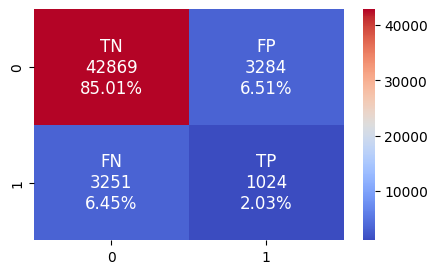

In [78]:
predict(logreg_tuned)

Random Forest

In [87]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'class_weight': [{0: 7, 1: 3}]
                      }

# -------------------------------------------------------------------------------
rf = RandomForestClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
rf_tuned = model_selection.RandomizedSearchCV(rf, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=42)

# fit model
rf_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", rf_tuned.best_params_)

Best parameters:  {'n_estimators': 300, 'max_depth': 10, 'class_weight': {0: 7, 1: 3}}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     46153
           1       0.25      0.26      0.26      4275

    accuracy                           0.87     50428
   macro avg       0.59      0.59      0.59     50428
weighted avg       0.87      0.87      0.87     50428

------------------------------------------------------- 

AUC Test score: 0.7259
AUC Train scores: 0.8031
------------------------------------------------------- 



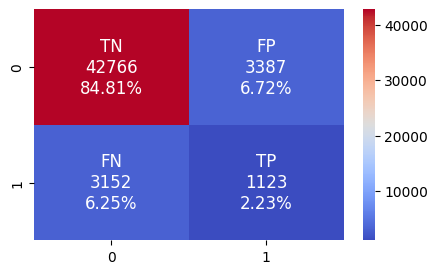

In [88]:
predict(rf_tuned)

XGBoost

In [90]:
param_distributions = {
    'learning_rate': [0.1, 0.2, 0,3, 0.4],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0, 1.5, 2.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      }

# -------------------------------------------------------------------------------
xgb = XGBClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
xgb_tuned = model_selection.RandomizedSearchCV(xgb, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
xgb_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", xgb_tuned.best_params_)

Best parameters:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.66      0.78     46153
           1       0.16      0.69      0.26      4275

    accuracy                           0.66     50428
   macro avg       0.56      0.67      0.52     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7326
AUC Train scores: 0.7386
------------------------------------------------------- 



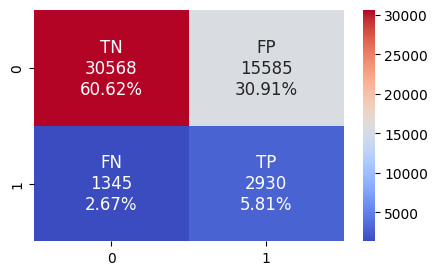

In [91]:
predict(xgb_tuned)

Kesimpulan:

Setelah dilakukan evaluasi model dan berdasarkan skor AUC pada data pengujian (test), model XGBoost memiliki skor tertinggi yaitu 0.7326, diikuti oleh model Random Forest dengan skor 0.7259, dan model Logistic Regression dengan skor 0.7096. Model XGBoost juga memiliki waktu pelatihan yang relatif lebih cepat dibandingkan dengan LogisticRegression dan RandomForest. Jadi, dalam kasus ini, berdasarkan skor AUC pada data pengujian, model XGBoost mungkin pilihan terbaik.